## XGBoost applied on stocks

In [38]:
import warnings
warnings.simplefilter('ignore')

import xgboost

from xgboost import XGBClassifier

#classification report and confusion matris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#yahoo finance data
from pandas_datareader import data

import matplotlib.pyplot as plt
import seaborn as sn

import pandas as pd
import numpy as np

import xgboost
from xgboost import plot_tree

import quantstats as qs

In [2]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

#'C:/ProgramData/Anaconda/Library/bin/graphviz'

In [3]:
ticker = 'PRG'
data = pd.read_excel(ticker + '.xlsx', sheet_name='Лист1')

In [4]:
data = data.replace('NM', 0.0)
data['Return'] = data['IQ_LASTSALEPRICE'].pct_change()
data['Label'] = [1 if i > 0 else 0 for i in data['Return']]
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 535
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Ticker                535 non-null    object        
 1   Date                  535 non-null    datetime64[ns]
 2   IQ_LASTSALEPRICE      535 non-null    float64       
 3   IQ_PE_EXCL            535 non-null    float64       
 4   IQ_PE_EXCL_FWD        535 non-null    float64       
 5   IQ_TEV_EBITDA         535 non-null    float64       
 6   IQ_TEV_EBITDA_FWD     535 non-null    float64       
 7   IQ_TEV_TOTAL_REV      535 non-null    float64       
 8   IQ_TEV_TOTAL_REV_FWD  535 non-null    float64       
 9   Return                535 non-null    float64       
 10  Label                 535 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 50.2+ KB


In [6]:
data['Label'].value_counts()

1    279
0    256
Name: Label, dtype: int64

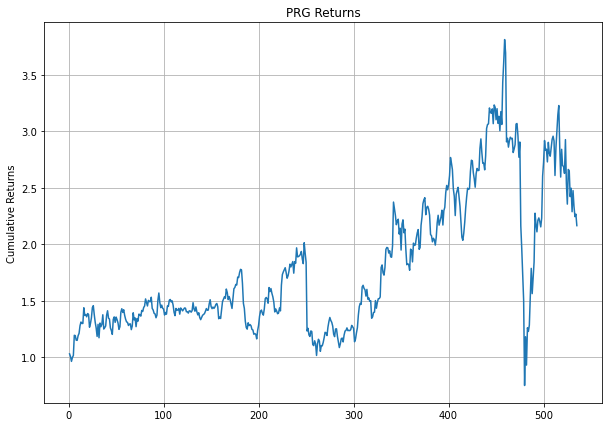

In [7]:
plt.figure(figsize=(10, 7))
# Access the dataframe of GOOG from the dictionary
# and then compute and plot the returns

(data['Return'] + 1).cumprod().plot()
    
# Set the title and axis lables and plot grid
plt.title(f'{ticker} Returns')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

<AxesSubplot:>

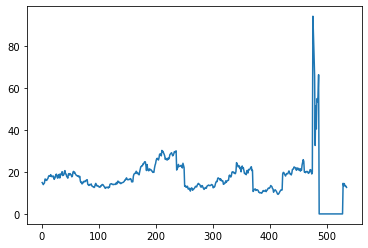

In [8]:
data['IQ_PE_EXCL'].plot()

<AxesSubplot:>

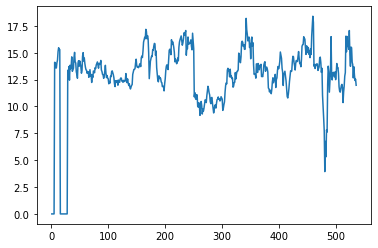

In [9]:
data['IQ_PE_EXCL_FWD'].plot()

<AxesSubplot:>

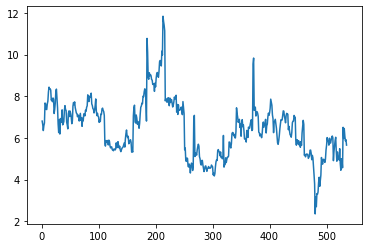

In [10]:
data['IQ_TEV_EBITDA'].plot()

<AxesSubplot:>

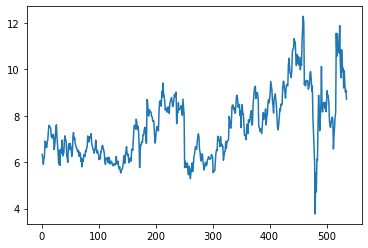

In [11]:
data['IQ_TEV_EBITDA_FWD'].plot()

<AxesSubplot:>

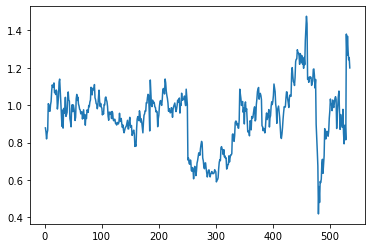

In [12]:
data['IQ_TEV_TOTAL_REV'].plot()

<AxesSubplot:>

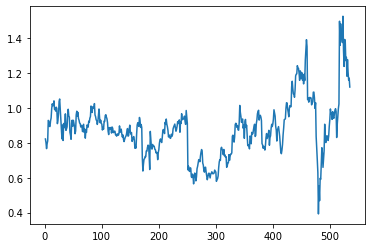

In [13]:
data['IQ_TEV_TOTAL_REV_FWD'].plot()

In [14]:
#Training data and test data
data.columns.tolist()

['Ticker',
 'Date',
 'IQ_LASTSALEPRICE',
 'IQ_PE_EXCL',
 'IQ_PE_EXCL_FWD',
 'IQ_TEV_EBITDA',
 'IQ_TEV_EBITDA_FWD',
 'IQ_TEV_TOTAL_REV',
 'IQ_TEV_TOTAL_REV_FWD',
 'Return',
 'Label']

In [15]:
features = [
    #'Ticker',
    #'Date',
    #'IQ_LASTSALEPRICE',
    'IQ_PE_EXCL',
    'IQ_PE_EXCL_FWD',
    'IQ_TEV_EBITDA',
    'IQ_TEV_EBITDA_FWD',
    'IQ_TEV_TOTAL_REV',
    'IQ_TEV_TOTAL_REV_FWD',
    #'Return'
]

# Get predictor variables
X = data[features]
    
# Get the target variable
y = data['Label']

train_length = int(len(X)*0.80)
X_train = X[:train_length]
X_test = X[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

In [16]:
data.shape, X_train.shape, X_test.shape

((535, 11), (428, 6), (107, 6))

In [17]:
#Initialising the XGBoost model

In [18]:
model = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05)

model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [19]:
#Cross validation

kfold = KFold (n_splits=5)

results = cross_val_score(model,X_train, y_train, cv=kfold)
mresults = results.mean()*100
stdresults = results.std()*100

print(f"Accuracy: {mresults} ({stdresults})")

[13:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [20]:
model.fit(X_train, y_train)

[13:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

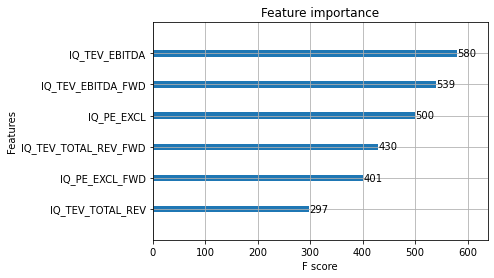

In [21]:
xgboost.plot_importance(model,max_num_features=10)
plt.show()

In [22]:
#predict and classification report

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.28      0.37        50
           1       0.56      0.81      0.66        57

    accuracy                           0.56       107
   macro avg       0.56      0.54      0.52       107
weighted avg       0.56      0.56      0.53       107



In [24]:
t = model.predict_proba(X_test[-1:])
t

array([[0.17981452, 0.8201855 ]], dtype=float32)

In [25]:
model.predict(X_test[-1:])

array([1], dtype=int64)

In [26]:
data[-1:]

,Ticker,Date,IQ_LASTSALEPRICE,IQ_PE_EXCL,IQ_PE_EXCL_FWD,IQ_TEV_EBITDA,IQ_TEV_EBITDA_FWD,IQ_TEV_TOTAL_REV,IQ_TEV_TOTAL_REV_FWD,Return,Label
535,PRG,2021-04-09,43.36,12.6414,11.96844,5.65497,8.71406,1.1992,1.12084,-0.044934,0


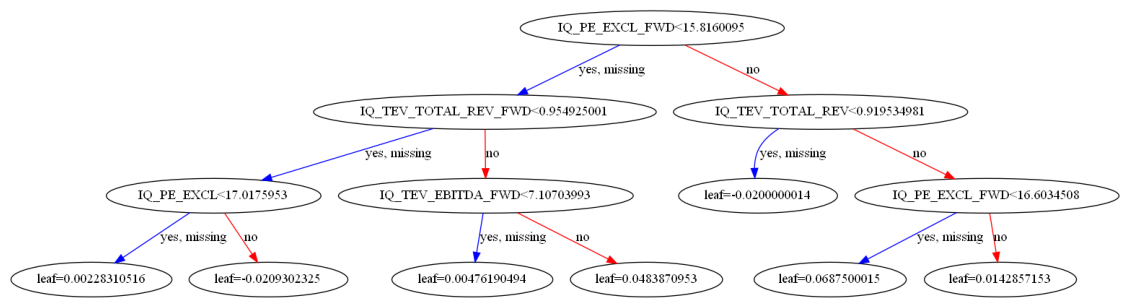

In [27]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(20,20)

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

In [28]:
1/(1+np.exp(0.06470585589*-1))

0.5161708223018718

In [29]:
#confusion matrix

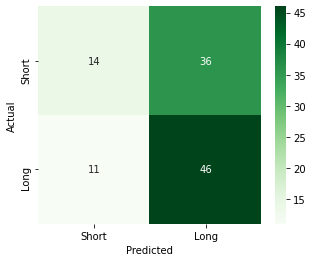

In [30]:
array = confusion_matrix(y_test, y_pred)

df = pd.DataFrame(array, index=['Short', 'Long'], columns=['Short', 'Long'])
    
plt.figure(figsize=(5, 4))
sn.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
#Individual stock performance

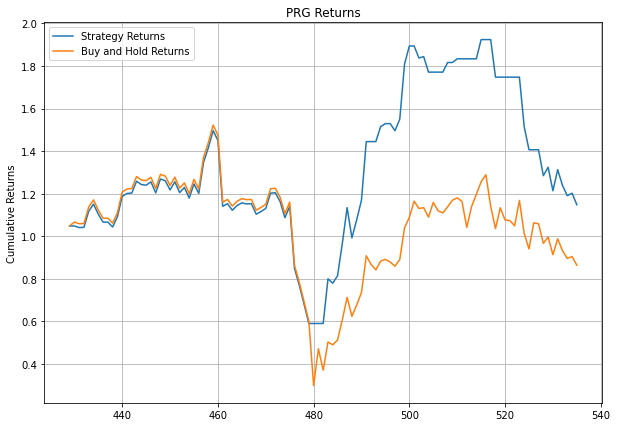

In [32]:
# Create an empty dataframe to store the strategy returns of individual stocks\n",
#portfolio = pd.DataFrame(columns=stock_list)
    
# Get the data
df = data.copy()
# Store the predictor variables in X

    
#Define the train and test dataset
train_length = int(len(X)*0.80)
df = df[train_length:]
    
# Predict the signal and store in predicted signal column
df['predicted_signal'] = model.predict(X_test)
    
# Calculate the strategy returns
df['strategy_returns'] = df['Return'] * df.predicted_signal
    
#Set the figure size
plt.figure(figsize=(10, 7))
    
# Calculate the cumulative strategy returns and plot
(df.strategy_returns + 1).cumprod().plot()
(df.Return + 1).cumprod().plot()   
  
# Set the title, label and grid
plt.title(ticker + ' Returns')
plt.ylabel('Cumulative Returns')
plt.legend(labels=['Strategy Returns', 'Buy and Hold Returns'])
plt.grid()
plt.show()

In [33]:
X_test.shape

(107, 6)

In [34]:
X_train.shape

(428, 6)

In [35]:
df.shape

(107, 13)

In [36]:
#Performance of portfolio

In [37]:
# Drop missing values 
portfolio.dropna(inplace=True) 

# Set the figure size 
plt.figure(figsize=(10, 7)) 
    
# Calculate the cumulative portfolio returns by assuming equal allocation to the stocks 
(portfolio.mean(axis=1)+1).cumprod().plot() 
    
# Set the title and label of the chart 
plt.title('Portfolio Strategy Returns') 
plt.ylabel('Cumulative Returns') 
plt.grid() 
plt.show()

NameError: name 'portfolio' is not defined

In [ ]:
#detailed feedback on the test set

import pyfolio as pf
pf.create_full_tear_sheet(portfolio.mean(axis=1))

In [40]:
df

,Ticker,Date,IQ_LASTSALEPRICE,IQ_PE_EXCL,IQ_PE_EXCL_FWD,IQ_TEV_EBITDA,IQ_TEV_EBITDA_FWD,IQ_TEV_TOTAL_REV,IQ_TEV_TOTAL_REV_FWD,Return,Label,predicted_signal,strategy_returns
429,PRG,2019-03-29,52.60,18.92086,14.03202,7.06892,9.20607,1.03805,0.99870,0.048226,1,1,0.048226
430,PRG,2019-04-05,53.51,19.24820,14.27478,7.17862,9.34893,1.05415,1.01420,0.017300,1,0,0.000000
431,PRG,2019-04-12,53.13,19.11151,14.17340,7.13281,9.28927,1.04743,1.00773,-0.007101,0,1,-0.007101
432,PRG,2019-04-19,53.17,19.12590,14.18408,7.13763,9.29286,1.04814,1.00841,0.000753,1,1,0.000753
433,PRG,2019-04-26,57.06,19.90188,14.63715,6.39622,10.18723,1.17141,1.12188,0.073162,1,1,0.073162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,PRG,2021-03-12,49.58,14.45481,13.68532,6.45451,9.93642,1.36875,1.27862,0.081824,1,1,0.081824
532,PRG,2021-03-19,46.78,13.63848,12.91245,6.09459,9.38234,1.29243,1.20732,-0.056474,0,1,-0.056474
533,PRG,2021-03-26,44.96,13.10787,12.41008,5.86064,9.02219,1.24281,1.16098,-0.038906,0,1,-0.038906
534,PRG,2021-04-02,45.40,13.23615,12.53154,5.91720,9.10926,1.25481,1.17218,0.009786,1,1,0.009786


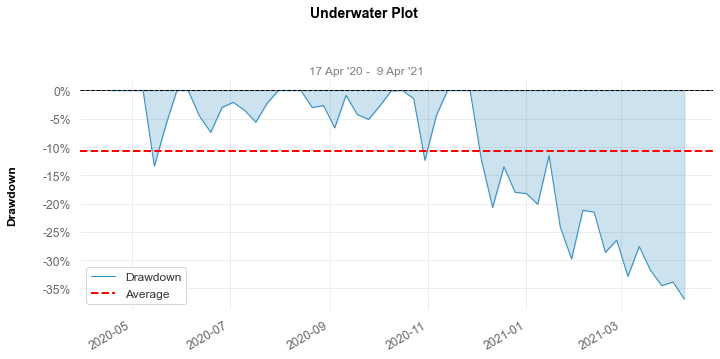

In [50]:
df['Logreturn'] = np.log(df['IQ_LASTSALEPRICE']/df['IQ_LASTSALEPRICE'].shift(1))
df = df.tail(52)
#df = df.set_index('Date')
qs.plots.drawdown(df['Logreturn'])